In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
interpunction = re.compile(r'(\s|\w)[\.,?:\(\)]{1,}(\w|\s)?')
math = re.compile(r'\[math\].+\[\/math\]')
concat_nr_word = re.compile(r'\d\w|\d\w')
dollars = re.compile(r'$\d+\w?|\d+$')
clean_interpunction = re.compile(r'(?=\w)[^a-z]{1,}|[^a-z]{1,}(?=\w)|(?=\w)[^a-z]{1,}(?=\w)')
spacing = re.compile(r'\s{2,}')
que = re.compile(r'\w[\?]')

In [8]:
test_df = pd.read_csv('test.csv')

In [5]:
def preprocess(x):
    
    w = interpunction.search(x)
    c = concat_nr_word.search(x)
    i = 0
    
    while bool(w):
        
        st, en = w.span()
        x = x[:st+1] + ' ' + x[st+1:]
        i += 1
        w = interpunction.search(x)
        
        if i > 20:
            break
    
    i = 0
    
    while bool(c):
        
        st, en = c.span()
        x = x[:st] + ' ' + x[st:]
        i += 1
        
        c = concat_nr_word.search(x)
        if i > 20:
            break
            
    q = que.search(x)
    while bool(q):
        
        s, e = q.span()
        x = x[:s+1] + ' '+ x[s+1:]
        
        q = que.search(x)
        
            
    x = x.lower()
    x = math.sub(' matheq ', x)
    x = dollars.sub(' someamountofmoney ', x)
    x = clean_interpunction.sub(' ', x)
    x = spacing.sub(' ', x)
    
    return x

In [9]:
test_df['question1'] = test_df['question1'].astype(str).apply(preprocess)
print('first one off')
test_df['question2'] = test_df['question2'].astype(str).apply(preprocess)

first one off


In [11]:
test_df.to_csv('preprocessed_test.csv')

In [108]:
lengths = list(map(len, df['question1'].apply(preprocess).apply(lambda x: x.split())))

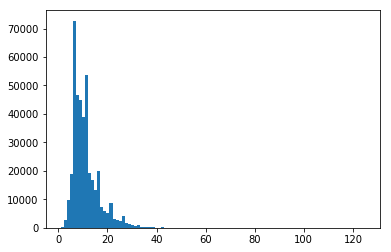

In [62]:
plt.hist(lengths, bins=100)
plt.show()

In [64]:
lengths2 = list(map(len, df['question2'].astype(str).apply(preprocess).apply(lambda x: x.split())))

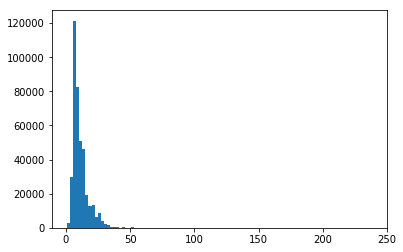

In [65]:
plt.hist(lengths2, bins=100)
plt.show()

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
preprocessed_df = df['question1'].astype(str).apply(preprocess)

preprocessed_df = pd.concat([preprocessed_df, df['question2'].astype(str).apply(preprocess)], axis=1)

In [10]:
word_count = {}

for col in ['question1', 'question2']:
    
    for q in preprocessed_df[col].astype(str):
        
        seq = q.split()
        
        for w in seq:
            if w not in word_count:
                word_count[w] = 0
                
            word_count[w] += 1

In [34]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [35]:
preprocessed_df = pd.concat([preprocessed_df, df['is_duplicate']], axis=1)

In [36]:
preprocessed_df.to_csv('preprocessed.csv')

In [11]:
import operator

In [12]:
words_with_counts = sorted(word_count.items(), key=operator.itemgetter(1))[::-1]

In [15]:
vocab, words_nrs = list(zip(*words_with_counts[:int(1e5)]))

In [176]:
vect = CountVectorizer(vocabulary=vocab, binary=True).fit(vocab)

In [183]:
vect.transform(preprocessed_df.ix[:3, 'question1'].tolist()).toarray().nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([    1,     2,     3,     7,     8,    38,    60,   382,   565,
          743,  1249,  2583,     1,     2,     3,     9,   587,  4616,
        14092, 14658, 22567,     1,     5,     9,    14,    18,   139,
          193,   212,   358,   437,  1816,  2781,     5,    14,    17,
           20,    75,   290,   617,  2727,  2755]))